# Zachary's Karate Club

Zachary’s Karate Club has become a famous dataset in social network analysis, probably because it is not too large and has many interesting properties, which makes it great for teaching SNA. We will use it to apply our newly acquired knowledge about measures of centrality and visualise the results. The dataset can be found at the UCI Network Repository (see the further reading below).

Zachary studied his university’s karate club in the early 1970s and found that the two leaders of the club had had a dispute that caused the club to split into two factions, one around each leader. He wrote a paper and collected data about this situation.

## Notebook setup

This notebook was developed with the following versions:

Python = 3.12.6
 
matplotlib = 3.9.2  
networkx = 3.3  

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

## Create graph

In [2]:
G = nx.karate_club_graph() # dataset comes pre-loaded in networkx
pos = nx.spring_layout(G, seed = 675) # a seed is a number that enables the spring layout to proudce its best result, its found by trial and error

## Distance Measures

* Diameter is the maximum distance between any pair of vertices in G
* Eccentricity of a vertex is the farthest distance between it and all other vertices in G
* Radius is the minimum eccentricity in G
* Periphery is the set of all vertices that have eccentricity equal to the diameter
* Centre is the set of vertices where eccentricity is equal to the radius

### Matplotlib Colour Maps
https://matplotlib.org/stable/tutorials/colors/colormaps.html

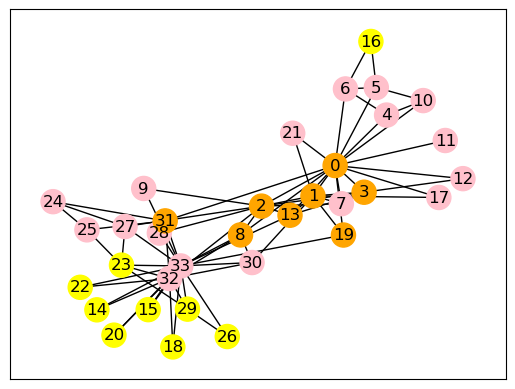

In [3]:
color_map = [] # to create a color map we have to first create a list 
for node in G:
    if node in nx.periphery(G):
        color_map.append('yellow')
    elif node in nx.center(G):
        color_map.append('orange')
    else:
        color_map.append('pink')
        
nx.draw_networkx(G, pos, node_color = color_map)

## Heat map Visualisation of Degree Centrality

### A modified function from Can Guney Aksakalli
https://aksakalli.github.io/2017/07/17/network-centrality-measures-and-their-visualization.html

In [4]:
# Define measures of centrality and produce dictionaries
deg = nx.degree_centrality(G)
close = nx.closeness_centrality(G)
bet = nx.betweenness_centrality(G)
eig = nx.eigenvector_centrality(G)
ecc = nx.eccentricity(G)

measures = [deg, close, bet, eig, ecc]
measure_names = ['Degree Centrality', 'Closeness Centrality', 'Betweenness Centrality', 'Eigenvector Centrality', 'Eccentricity']
plot_names = ['DC-Karate-Club.png', 'CC-Karate-Club.png', 'BC-Karate-Club.png', 'EC-Karate-Club.png', 'E-Karate-Club.png'] # this is just so I can save the plots

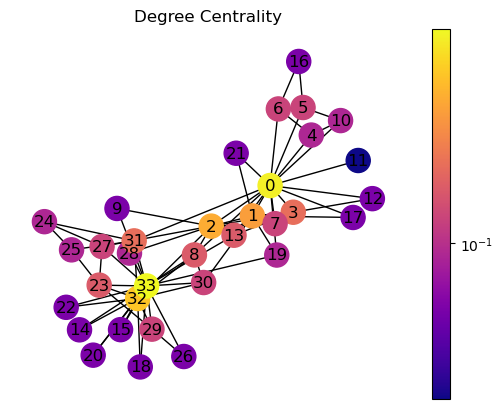

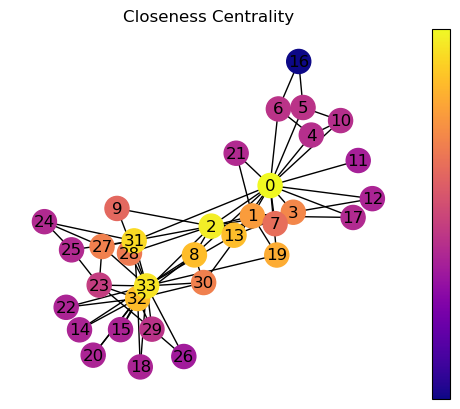

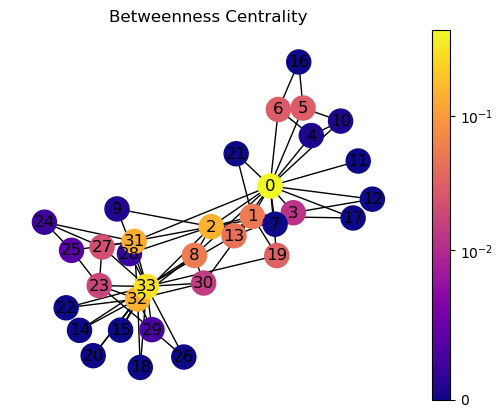

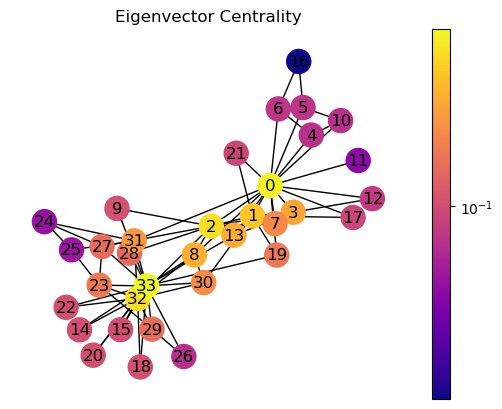

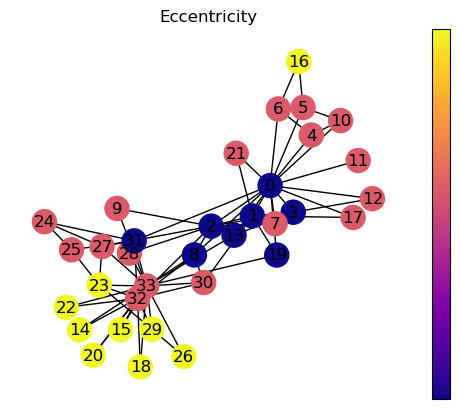

In [5]:
# iterate through the length of measure_names
for i in range(len(measure_names)): # creating a loop to create a graph for each measure
    fig = plt.figure()
    nodes = nx.draw_networkx_nodes(G, pos, cmap = plt.cm.plasma,  # cmap is color map, we're going to use plasma
                                node_color = list(measures[i].values()), # node colors according to the values in each liost
                                nodelist = measures[i].keys()) # adds the keys to each node
    nodes.set_norm(mcolors.SymLogNorm(linthresh = 0.01, linscale = 1, base = 10)) # normalise the color specification. Plasma uses a log scale so the colours are more distinct at the ends. Base 10 so it is normalised to 1
    labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)
    plt.title(measure_names[i]) # add title from the measure_names
    plt.colorbar(nodes) # add color bar
    plt.axis('off') # this removes the box around the graph, can use or not use
    plt.savefig(plot_names[i]) # save the plots
    plt.show()

In [20]:
# save the plot as png
plt.savefig('Zacharys-Karate-Club.png') # save the plot as a png

<Figure size 640x480 with 0 Axes>

In [13]:
eig[0] # each of the measures is just a dictionary so we can drill down into each vertex

0.35548349418519426

In [14]:
eig[33]

0.37337121301323506

In [15]:
deg[0]

0.48484848484848486

In [17]:
deg[33]

0.5151515151515151